<a href="https://colab.research.google.com/github/zahid-bracu/buet-iac-business-analytics/blob/main/Lecture_5_Data_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index Link : https://docs.google.com/document/d/1Ge6V177CgHwGb2YlLgGheF6jb0xDmr728h6BSwig4rA/edit?usp=sharing

####What is Data Preprocessing?
It is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources, it is collected in raw format, whichisnot feasible for analysis. Therefore, certain steps are executed to convert the dataintoasmall clean data set. This technique is performed before the execution of theIterativeAnalysis. The set of steps is known as Data Preprocessing. It includes -Data Transformationand Data Integration

#Data loading & Description

####Mount google drive

In [1]:
from google.colab import drive #importing google drive library from google colab
drive.mount('/content/drive') #mounting the google drive

Mounted at /content/drive


####Loading data from google drive

In [2]:
import pandas as pd #importing panda library
file_path = "/content/drive/My Drive/Datas/e-commerce-data.xlsx" #Create file path

#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
fact_table = pd.read_excel(file_path, sheet_name='Fact_table', engine='openpyxl')

####Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
Load the tables (item_dim, customer_dim, time_dim, store_dim) fromthe e-commerce dataset.

In [3]:
#Loading particular sheet of xlsx data into pandas data frame from the xlsx file located in google drive
item_dim = pd.read_excel(file_path, sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(file_path, sheet_name='Coustomer_dim', engine='openpyxl')
time_dim= pd.read_excel(file_path, sheet_name='Time_dim', engine='openpyxl')
store_dim= pd.read_excel(file_path, sheet_name='Store_dim', engine='openpyxl')

####Describe data's count, mean, min, max, standard deviation of all numeric columns etc

In [4]:
#describing those data
fact_table.describe()

,quantity,unit_price,total_price
count,9997.000000,9999.000000,9995.000000
mean,5.974492,17.455446,103.973112
std,3.167880,8.535518,79.235693
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,87.500000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


####Check data shape like rows & columns number

In [5]:
fact_table.shape #checking data shapre = rows x columns

(10000, 9)

10000 rows x 9 columns

####Data info : data type and column data count & null count

In [6]:
fact_table.info() #checking data types of column and data count in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payment_key    10000 non-null  object 
 1   coustomer_key  10000 non-null  object 
 2   time_key       10000 non-null  object 
 3   item_key       10000 non-null  object 
 4   store_key      10000 non-null  object 
 5   quantity       9997 non-null   float64
 6   unit           9953 non-null   object 
 7   unit_price     9999 non-null   float64
 8   total_price    9995 non-null   float64
dtypes: float64(3), object(6)
memory usage: 703.2+ KB


####Check number of null data in each column

In [7]:
#checking missing value count in each column
fact_table.isnull().sum()

payment_key       0
coustomer_key     0
time_key          0
item_key          0
store_key         0
quantity          3
unit             47
unit_price        1
total_price       5
dtype: int64

####Checking number of null data in each column in other way

In [8]:
#checking missing value count in each column - another way
fact_table.apply(lambda x: sum(x.isnull()))

payment_key       0
coustomer_key     0
time_key          0
item_key          0
store_key         0
quantity          3
unit             47
unit_price        1
total_price       5
dtype: int64

####Plotting null value for each column in data set

<Axes: >

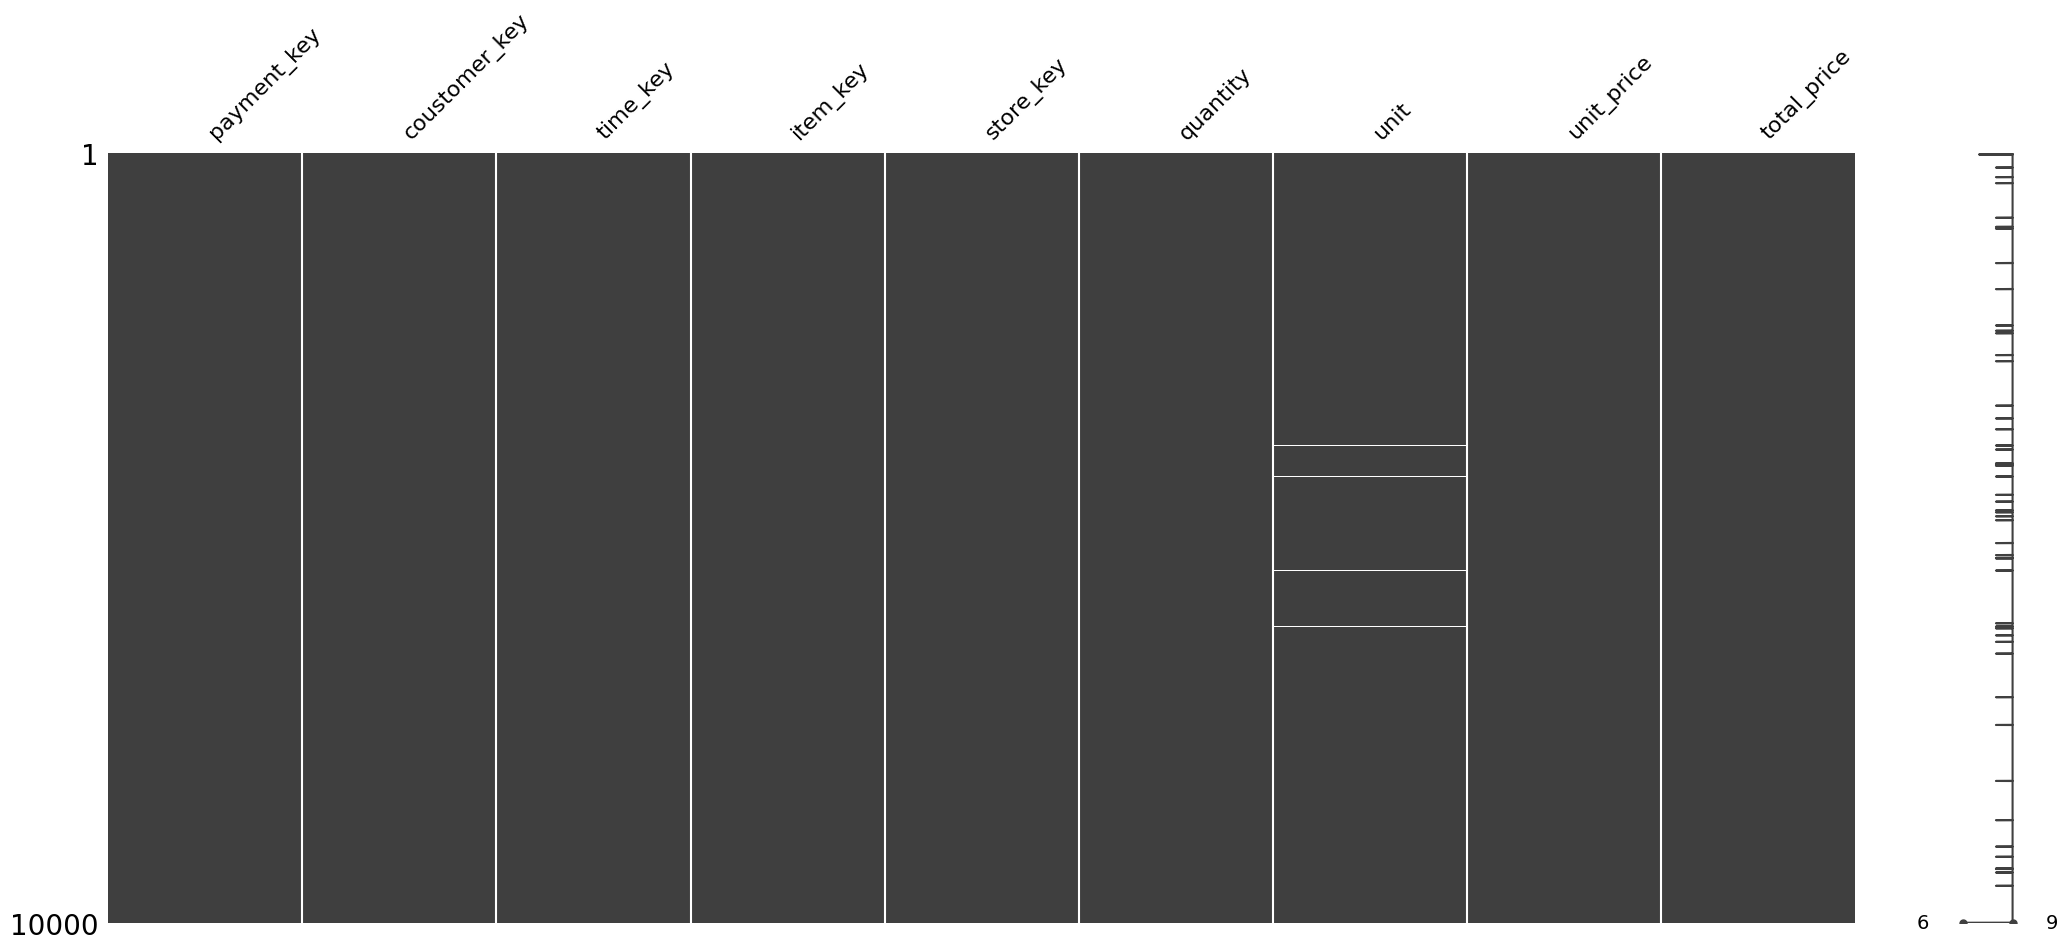

In [9]:
#plotting null value / missing data in the dataset
import missingno as msno
msno.matrix(fact_table)

#Data Type Change

In [10]:
fact_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payment_key    10000 non-null  object 
 1   coustomer_key  10000 non-null  object 
 2   time_key       10000 non-null  object 
 3   item_key       10000 non-null  object 
 4   store_key      10000 non-null  object 
 5   quantity       9997 non-null   float64
 6   unit           9953 non-null   object 
 7   unit_price     9999 non-null   float64
 8   total_price    9995 non-null   float64
dtypes: float64(3), object(6)
memory usage: 703.2+ KB


In [11]:
fact_table['time_key'] = pd.to_datetime(fact_table['unit_price'])
fact_table.dtypes

payment_key              object
coustomer_key            object
time_key         datetime64[ns]
item_key                 object
store_key                object
quantity                float64
unit                     object
unit_price              float64
total_price             float64
dtype: object

#Missing Value Handling and Filling

---



####checking missing value count in each column - another way

In [12]:
#checking missing value count in each column - another way
fact_table.apply(lambda x: sum(x.isnull()))

payment_key       0
coustomer_key     0
time_key          1
item_key          0
store_key         0
quantity          3
unit             47
unit_price        1
total_price       5
dtype: int64

####Check the count of distinct value in a column in sorted way : Unit Column

In [13]:
#checking distinct value count in each column sorted
fact_table['unit'].value_counts()

unit
ct          3490
cans        2165
bottles     1432
oz           738
bags         504
pk           393
ct.          286
pack         206
bars         189
tubs         111
Bags         108
Ct            77
rolls         74
lb            41
tins          37
cartons       35
botlltes      35
oz.           32
Name: count, dtype: int64

####Fill the null values or missing values with particular values or the distinct value with highest value count


In [14]:
# fill the null values or missing values with particular values or the distinct value with highest value count
fact_table.unit = fact_table.unit.fillna('ct')

##Mode imputation to fill missing value

In [15]:
# Sample DataFrame with missing values
Sample_data = {'category': ['A', 'B', 'C', 'A', 'B', None, 'C', 'A', 'A', None],
        'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
mode_df = pd.DataFrame(Sample_data) #converting the dictionary into pandas dataframe
mode_df

,category,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,None,6
6,C,7
7,A,8
8,A,9
9,None,10


In [16]:
#Check number of null data in each column
mode_df.isnull().sum()

category    2
value       0
dtype: int64

In [17]:
# Mode imputation
mode_value = mode_df['category'].mode()[0]  # Calculate the mode
print(mode_value)

A


In [18]:
mode_df['category'].fillna(mode_value, inplace=True)  # Fill missing values with mode
# Display DataFrame after mode imputation
print("\nDataFrame after mode imputation:")
print(mode_df)


DataFrame after mode imputation:
  category  value
0        A      1
1        B      2
2        C      3
3        A      4
4        B      5
5        A      6
6        C      7
7        A      8
8        A      9
9        A     10


##Predictive Imputation

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with missing values
sample_data = {'feature1': ['A', 'B', 'C', 'A', 'B', None, 'C', 'A', 'A', None],
        'feature2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
pa_df = pd.DataFrame(sample_data)
pa_df

,feature1,feature2
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,None,6
6,C,7
7,A,8
8,A,9
9,None,10


In [20]:
# Encode categorical feature to numerical values
le = LabelEncoder()
pa_df['feature1_encoded'] = le.fit_transform(pa_df['feature1'].astype(str))

# Separate data into features and target
X_train = pa_df.dropna()[['feature2']]  # Use non-missing values for training
y_train = pa_df.dropna()['feature1_encoded']

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = pa_df[pa_df['feature1'].isnull()][['feature2']]  # Features with missing values
predicted_values = model.predict(X_missing)

# Inverse transform predicted numerical values to original categorical values
predicted_categories = le.inverse_transform(predicted_values)

# Fill missing values with predicted values
pa_df.loc[pa_df['feature1'].isnull(), 'feature1'] = predicted_categories

# Drop the encoded feature column
pa_df.drop('feature1_encoded', axis=1, inplace=True)

# Display DataFrame after predictive imputation
print("DataFrame after predictive imputation:")
print(pa_df)

DataFrame after predictive imputation:
  feature1  feature2
0        A         1
1        B         2
2        C         3
3        A         4
4        B         5
5        A         6
6        C         7
7        A         8
8        A         9
9        A        10


#Other

####Drop unit column from the fact_table

In [21]:
fact_table.drop(['unit'],axis=1,inplace=True)

####Export CSV File

In [22]:
fact_table.to_csv("fact_table.csv",index=False)

#**`Pracetice`**

####Question 1
Question 1.1 : Load the tables (item_dim, customer_dim, time_dim, store_dim) fromthe e-commerce dataset.

In [44]:
fact_table = pd.read_excel(file_path, sheet_name='Fact_table', engine='openpyxl')
item_dim = pd.read_excel(file_path, sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(file_path, sheet_name='Coustomer_dim', engine='openpyxl')
time_dim= pd.read_excel(file_path, sheet_name='Time_dim', engine='openpyxl')
store_dim= pd.read_excel(file_path, sheet_name='Store_dim', engine='openpyxl')

####Question 2
Question 2.1.1 : Change the date from time_dim to pandas date-time series format, and unit_price,
total_price from fact_table to pandas numeric format.

Question 2.1.2 : Check the data types of the fact_table.

In [30]:
time_dim['date'] = pd.to_datetime(time_dim['date'])
fact_table['unit_price'] = pd.to_numeric( fact_table['unit_price'])
fact_table['total_price'] = pd.to_numeric( fact_table['total_price'])


In [31]:
time_dim.dtypes

time_key            object
date        datetime64[ns]
hour                 int64
day                  int64
week                object
month                int64
quarter             object
year                 int64
dtype: object

In [32]:
fact_table.dtypes

payment_key              object
coustomer_key            object
time_key         datetime64[ns]
item_key                 object
store_key                object
quantity                float64
unit_price              float64
total_price             float64
dtype: object

####Question 3
Question 3.1 : Visualize the last 10 data of the fact table

In [33]:
fact_table.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_price,total_price
0,P020,C006433,1970-01-01 00:00:00.000000015,I00170,S0010,6.0,15.0,90.0
1,P036,C007845,1970-01-01 00:00:00.000000033,I00261,S0014,8.0,33.0,264.0
2,P004,C000496,1970-01-01 00:00:00.000000014,I00235,S0003,4.0,14.0,56.0
3,P009,C002367,1970-01-01 00:00:00.000000015,I00082,S0016,11.0,15.0,165.0
4,P012,C007521,1970-01-01 00:00:00.000000024,I00137,S0016,9.0,24.0,216.0


####Question 4
Question 4.1 : Fill in the unit_price and total_price missing values of fact_table

In [40]:
mean_value_unit_price = fact_table['unit_price'].mean()
mean_value_total_price = fact_table['total_price'].mean()
fact_table['unit_price'] = fact_table['unit_price'].fillna(mean_value_unit_price)
fact_table['total_price'] = fact_table['total_price'].fillna(mean_value_total_price)
print("Unit price missing value : ",fact_table['unit_price'].isnull().sum())
print("Total price missing value : ",fact_table['total_price'].isnull().sum())

Unit price missing value :  0
Total price missing value :  0


####Question 5
Question 5.1 : Drop the unit_price column from the fact_table


In [45]:
fact_table = fact_table.drop('unit_price', axis=1)
fact_table

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,total_price
0,P020,C006433,T01398,I00170,S0010,6.0,ct.,90.0
1,P036,C007845,T01281,I00261,S0014,8.0,ct,264.0
2,P004,C000496,T06251,I00235,S0003,4.0,ct,56.0
3,P009,C002367,T03734,I00082,S0016,11.0,ct,165.0
4,P012,C007521,T01071,I00137,S0016,9.0,ct,216.0
...,...,...,...,...,...,...,...,...
9995,P006,C008903,T04156,I00063,S0001,7.0,cans,280.0
9996,P011,C004989,T07403,I00253,S0018,8.0,bags,168.0
9997,P039,C001920,T04869,I00168,S0014,NaN,ct,NaN
9998,P024,C004596,T06973,I00166,S0025,3.0,bags,51.0
